# Семинар 1

Это первый семинар нашего курса. Познакомимся с несколькими библиотеками (`numpy`, `scipy`, `matplotlib` и `pandas`). 
Документации

`scipy`: https://docs.scipy.org/doc/scipy/

`numpy`: https://numpy.org/doc/stable/index.html

`pandas`: https://pandas.pydata.org/docs/

`matplotlib`:https://matplotlib.org/stable/index.html

Установим нужные библиотеки:

In [1]:
!pip install matplotlib scipy numpy pandas openpyxl pooch

Импортируем всё необходимое:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
from scipy.signal.windows import blackman
from scipy.optimize import curve_fit
from scipy.integrate import quad

## NumPy
Посмотрим на базовые операции NumPy. Как создавать объекты, какой у них тип, какие можно делать с ними математические операции.

In [5]:
vec = np.array([[1, 2], [3, 4], [5, 6]])
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
type([1, 2, 3])

list

In [6]:
print(vec)

[[1 2]
 [3 4]
 [5 6]]


In [7]:
vec.dtype

dtype('int64')

In [8]:
type(vec)

numpy.ndarray

In [9]:
vec.shape

(3, 2)

In [10]:
vec.ndim

2

In [11]:
np.sum(vec)

np.int64(21)

In [12]:
np.sum(vec, axis=0)

array([ 9, 12])

In [13]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

In [14]:
np.sum(vec, axis=1)

array([ 3,  7, 11])

In [15]:
vec.sum()

np.int64(21)

In [16]:
vec.T

array([[1, 3, 5],
       [2, 4, 6]])

In [17]:
vec.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

In [21]:
vec[0, 1]

np.int64(2)

In [26]:
((vec * 2 + 1)/2).dtype

dtype('float64')

In [27]:
vec @ (vec**2).T

array([[  9,  41,  97],
       [ 19,  91, 219],
       [ 29, 141, 341]])

У вас должен был возникнуть логичный вопрос: а зачем нам это всё? Почему я не могу просто взять и писать на чистом Python, без привлечения внешних библиотек. Давайте на это ответим, посмотрев на перемножение матриц:

In [28]:
n = 300
A = np.random.rand(n, n)
B = np.random.rand(n, n)

In [30]:
%%time
C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            C[i, j] += A[i, k] * B[k, j]

CPU times: user 9.32 s, sys: 119 ms, total: 9.44 s
Wall time: 9.53 s


In [31]:
%%time
C = A @ B

CPU times: user 706 μs, sys: 2.43 ms, total: 3.14 ms
Wall time: 3.63 ms


## Pandas

Часто мы работаем с CSV файлами. Как их можно открывать при помощи Python? Одним из вариантом (далеко не единственным) является чтение при помощи библиотеки Pandas.

Научимся открывать файлы разного формата.

In [32]:
pd.read_csv("data_sem.csv")

,t,y
0,4995.911737,95.241770
1,19377.288306,82.658436
2,22543.111655,79.893690
3,34488.763827,70.951424
4,36635.042689,69.529489
...,...,...
95,967371.598259,0.088667
96,971294.202267,0.021576
97,978914.092362,0.119180
98,982794.402573,0.016406


In [33]:
pd.read_csv("data_sem.tsv")

,t\ty
0,4995.911737482706\t95.24176960494823
1,19377.288305641006\t82.65843596459784
2,22543.11165509215\t79.89369001005413
3,34488.7638267527\t70.95142385506101
4,36635.04268871775\t69.5294890606904
...,...
95,967371.5982591325\t0.08866688388213484
96,971294.202266923\t0.021576182457777912
97,978914.0923615168\t0.11917974536605608
98,982794.4025731941\t0.01640573955856062


In [34]:
pd.read_csv("data_sem.tsv", sep="\t")

,t,y
0,4995.911737,95.241770
1,19377.288306,82.658436
2,22543.111655,79.893690
3,34488.763827,70.951424
4,36635.042689,69.529489
...,...,...
95,967371.598259,0.088667
96,971294.202267,0.021576
97,978914.092362,0.119180
98,982794.402573,0.016406


In [35]:
pd.read_excel("data_sem.xlsx")

,t,y
0,4995.911737,95.241770
1,19377.288306,82.658436
2,22543.111655,79.893690
3,34488.763827,70.951424
4,36635.042689,69.529489
...,...,...
95,967371.598259,0.088667
96,971294.202267,0.021576
97,978914.092362,0.119180
98,982794.402573,0.016406


In [39]:
pd.read_excel("data_sem.xlsx").describe()

,t,y
count,100.000000,100.000000
mean,533782.590935,10.049086
std,289851.624062,20.698619
min,4995.911737,0.016406
25%,359008.677203,0.177998
50%,552003.290899,0.498393
75%,795877.813964,2.979101
max,990348.533290,95.241770


## Matplotlib
Мы осознали почему почти все остальные библиотеки используют NumPy внутри. Теперь давайте научимся строить картинки:

In [59]:
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 
nse2 = np.random.randn(len(t))          

s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, s1, linestyle="--", label="s1")
axs[0].plot(t, s2, label="s2")
axs[0].scatter(t, s2, s=5)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].legend()
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, NFFT=256, Fs=1. / dt)
axs[1].set_ylabel('Coherence')
#plt.tight_layout()
plt.savefig("fig.png")
plt.show()

Картинка получилась немного мыльной, а шрифты можно и увеличить. Как сделать лучше?

In [56]:
# Попросим matplotlib не жалеть пиксели
%matplotlib inline
%config InlineBackend.figure_format='retina'

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # Размер текста по умолчанию
plt.rc('axes', titlesize=SMALL_SIZE)     # Размер текста заголовка subplot
plt.rc('axes', labelsize=MEDIUM_SIZE)    # Размер текста подписей осей
plt.rc('xtick', labelsize=SMALL_SIZE)    # Размер текста штрихов по оси x
plt.rc('ytick', labelsize=SMALL_SIZE)    # Размер текста штрихов по оси y
plt.rc('legend', fontsize=SMALL_SIZE)    # Размер текста легенды
plt.rc('figure', titlesize=BIGGER_SIZE)  # Размер текста заголовка фигулы

/var/folders/6k/wpzb0pwn71g3ww4by8xqvb6h0000gn/T/ipykernel_6518/505001660.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


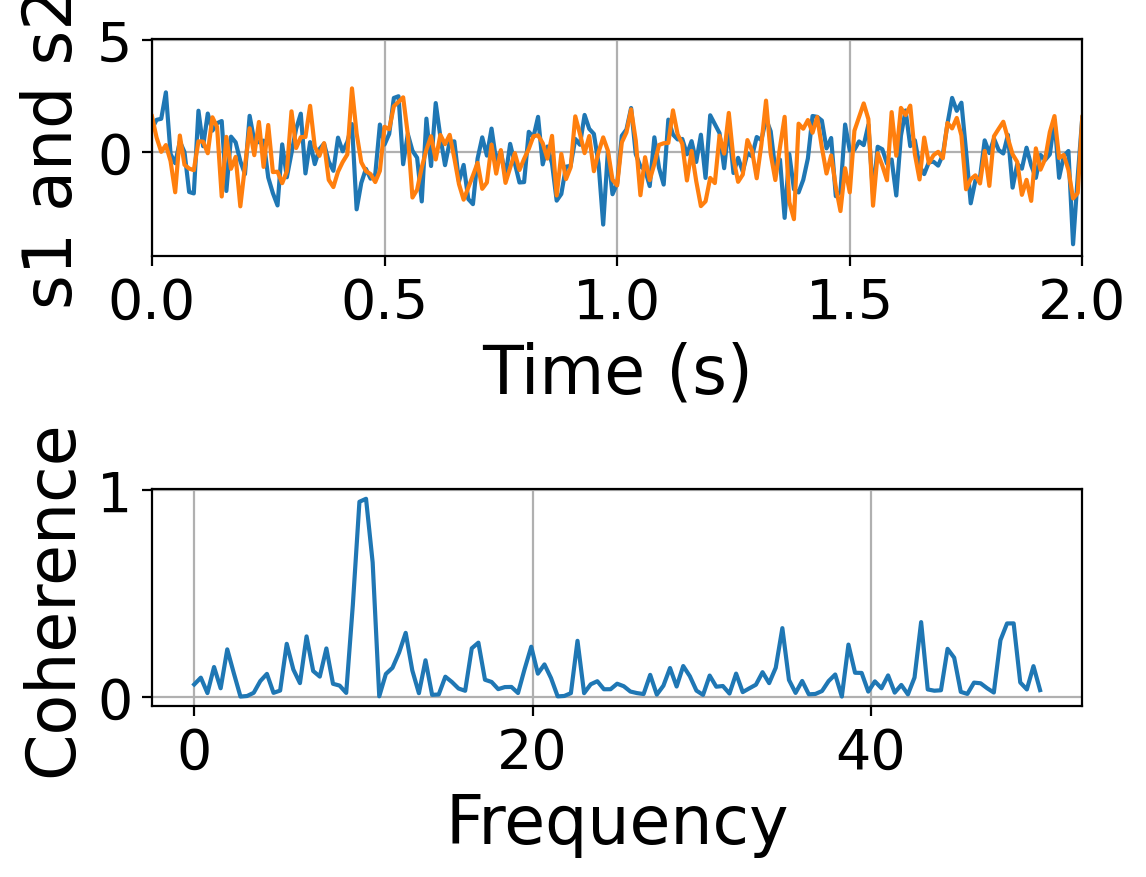

In [57]:
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))        
nse2 = np.random.randn(len(t))                

s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, NFFT=256, Fs=1. / dt)
axs[1].set_ylabel('Coherence')
plt.tight_layout()
plt.show()

In [58]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 900

## SciPy
Наверное, самая популярная библиотека для научных вычислений на Python. Посмотрим на базовый функционал, но очень советуем посмотреть на весь арсенал в документации.

Для начала разберемся с поиском пиков на примере ЭКГ. Данные ЭКГ идут в комплекте с библиотекой, поэтому просто воспользуемся ими.

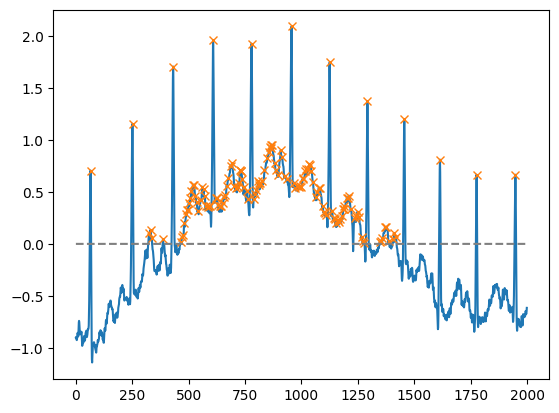

In [2]:
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

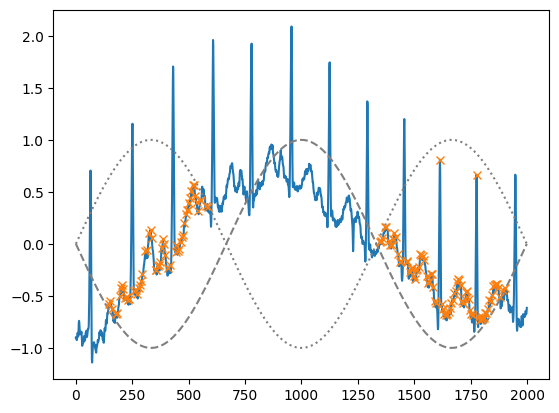

In [3]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

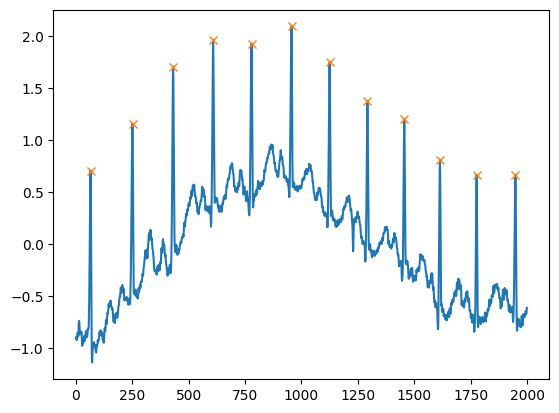

In [4]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

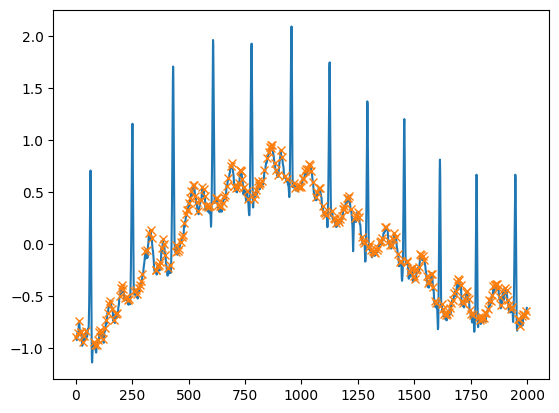

In [5]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
properties["prominences"].max()
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

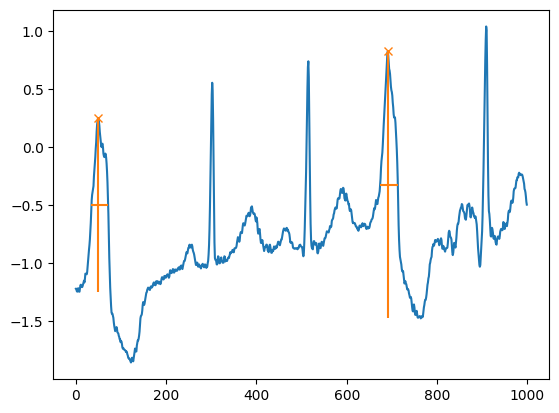

In [6]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

### Фурье преобразование
Теперь посмотрим на то, как сделать разложение Фурье.

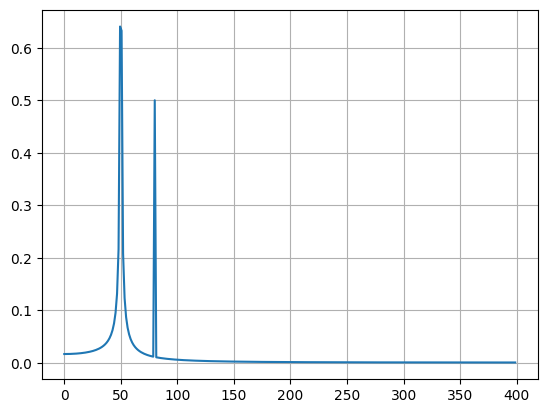

In [7]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Входной сигнал по своей природе является усеченным. Это усечение можно смоделировать как умножение бесконечного сигнала на прямоугольную оконную функцию. В спектральной области это умножение превращается в свертку спектра сигнала со спектром оконной функции, имеющую вид $\sin(x)/x$. Эта свертка является причиной эффекта, называемого спектральной утечкой. Окно сигнала с помощью специальной оконной функции помогает уменьшить спектральную утечку. В примере ниже используется окно `blackman` из `scipy.signal` и показан эффект оконной функции (нулевая компонента была обрезана для наглядности).

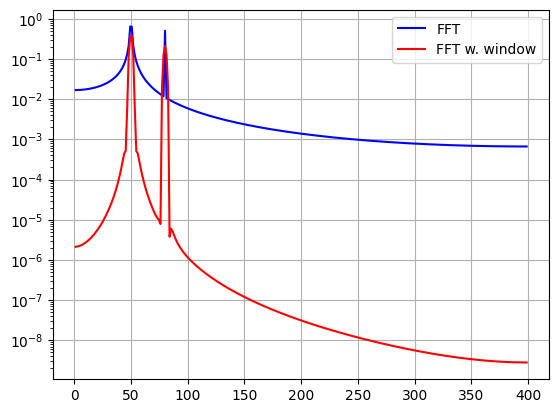

In [8]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

### Подгонка функций

Типичная задача: у вас есть какой-то известный физический (химический, биологический) закон, а также экспериментальные данные. От вас требуется найти какие-то параметры, которые входят в закон. Как это можно сделать?

Давайте рассмотрим на примере.

In [9]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

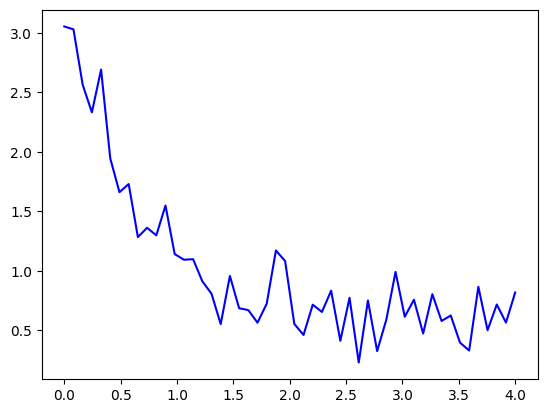

In [10]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

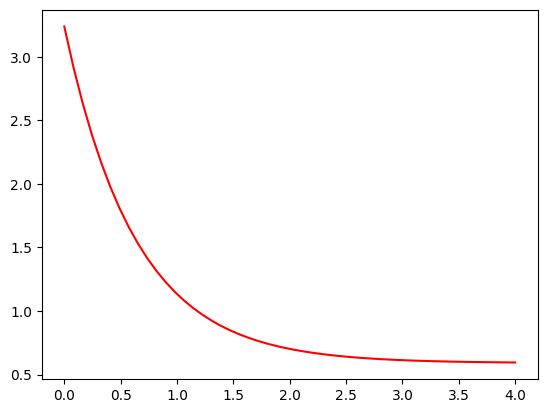

In [11]:
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

Допустим, что мы откуда-то знаем, что параметры могут принимать далеко не все значения. Как можно этим воспользоваться?

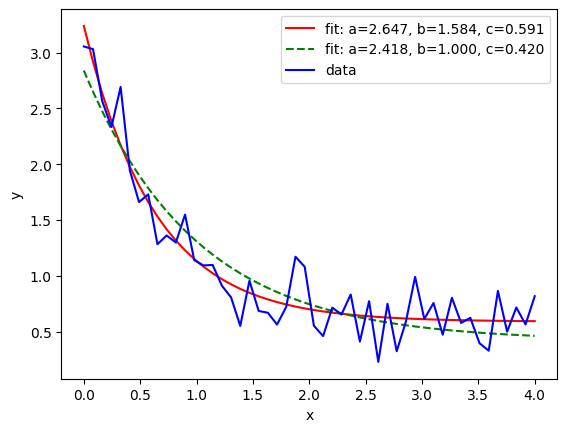

In [14]:
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Конечно, можно отрисовать график и понять, хорошо ли у нас получилось подогнать функцию?

Оказывается, `curve_fit` возвращает нам ещё и матрицу ковариации. Можно взять число её обусловленности, и на его основе говорить, хорошо или плохо получилось. Если число небольшое - все хорошо, иначе стоит задуматься.

In [15]:
np.linalg.cond(pcov)

np.float64(29.44803403284443)

Давайте сломаем наш фит, добавив ещё один параметр, который не будет нести смысла, и посмотрим на результат.

In [16]:
def func2(x, a, b, c, d):
    return a * d * np.exp(-b * x) + c
popt, pcov = curve_fit(func2, xdata, ydata)
np.linalg.cond(pcov)

np.float64(5.257598555060336e+16)

Иногда фит может упасть с ошибкой. В таких случаях стоит попробовать подобрать хотя бы масштаб параметров, или же сменить модель.

In [17]:
ydata = func(xdata, 500000, 0.01, 15)
try:
    popt, pcov = curve_fit(func, xdata, ydata, method = 'trf')
except RuntimeError as e:
    print(e)

Optimal parameters not found: The maximum number of function evaluations is exceeded.


А если мы знаем только масштаб чисел?

In [18]:
popt, pcov = curve_fit(func, xdata, ydata, method = 'trf',
                       x_scale = [1000, 1, 1])
popt

array([5.00000000e+05, 1.00000000e-02, 1.49999999e+01])

### Интегрирование

Численно интегрировать в python можно, например, с помощью scipy.quad

Давайте численно возьмем интеграл $\int_0^\infty \frac{\sin(t)}{t (t^2 + \gamma^2)}$, который был на семинаре по аналитическим приближенным методам и сравним результат с полученными нами асимптотиками для $\gamma \ll 1$ и $\gamma \gg 1$.

In [19]:
def integrand(t, gamma):
    return np.sin(t)/(t * (t**2 + gamma**2))

def int(gamma):
    return quad(integrand, 0, np.inf, args=(gamma))[0]

/var/folders/6k/wpzb0pwn71g3ww4by8xqvb6h0000gn/T/ipykernel_18361/2319513588.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, np.inf, args=(gamma))[0]
/var/folders/6k/wpzb0pwn71g3ww4by8xqvb6h0000gn/T/ipykernel_18361/2319513588.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand, 0, np.inf, args=(gamma))[0]


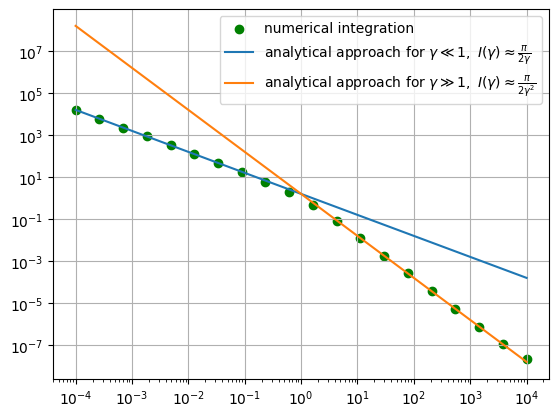

In [20]:
gammas = np.logspace(-4, 4, 20)
gammas_analytics= np.logspace(-4, 4, 1000)

plt.scatter(gammas, [int(gamma) for gamma in gammas], label = 'numerical integration', color = 'green')
plt.plot(gammas_analytics, np.pi/(2 * gammas_analytics), label = r'analytical approach for $\gamma \ll 1, \ I(\gamma) \approx \frac{\pi}{2 \gamma}$')
plt.plot(gammas_analytics, np.pi/(2 * gammas_analytics**2), label = r'analytical approach for $\gamma \gg 1, \ I(\gamma) \approx \frac{\pi}{2 \gamma^2}$')
plt.grid()
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

Проделаем тоже самое с интегралом $\int_0^x \frac{1 - \cos(t)}{t}$ и сравним результат с полученными нами асимптотиками для $x \ll 1$ и $x \gg 1$.

In [21]:
def integrand(t):
    return (1 - np.cos(t)) / t

def int(x):
    return quad(integrand, 0, x)[0]

/var/folders/6k/wpzb0pwn71g3ww4by8xqvb6h0000gn/T/ipykernel_18361/26362832.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, x)[0]


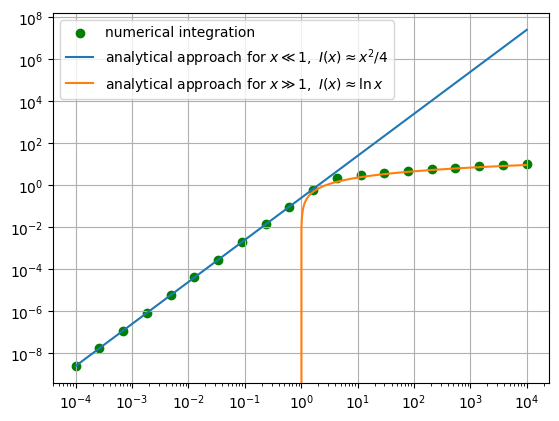

In [22]:
xs = np.logspace(-4, 4, 20)
xs_analytics = np.logspace(-4, 4, 1000)

plt.scatter(xs, [int(x) for x in xs], label = 'numerical integration', color = 'green')
plt.plot(xs_analytics, xs_analytics**2/4, label = r'analytical approach for $x \ll 1, \ I(x) \approx x^2/4$')
plt.plot(xs_analytics, np.log(xs_analytics), label = r'analytical approach for $x \gg 1, \ I(x)  \approx \ln x$')
plt.grid()
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()